# Assignment 4 Xinan Wang

## 1. Create a custom logistic regression model using the following dataset (20 points)

a) Split the dataset into training and test dataset 80:20

b) Custom logistic regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

c) Predict the age category using test dataset, and provide some insights

d) Show the predicted output, and loss function output plots, and explain the outcome

e) Calculate the Confusion matrix and explain the model accuracy


In [1]:
# import the required packages

%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# import the dataset
dfdata = pd.read_csv("abalone.data")
dfdata

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


We want to move the column of the dataset to be the first line.

In [287]:
# Get the top row of the dataset
new_row = dfdata.columns
new_row = pd.DataFrame(new_row).T
new_row.columns = ['SEX','LENGTH','DIAM','HEIGHT','WHOLE','SHUCK','VISCERA','SHELL','RINGS']
new_row

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [288]:
# Add the top row to the dataset and change the column name of the dataset
dfdata.columns = ['SEX','LENGTH','DIAM','HEIGHT','WHOLE','SHUCK','VISCERA','SHELL','RINGS']
dfdata = pd.concat([new_row,dfdata]).reset_index(drop = True)
dfdata

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
4173,M,0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
4174,M,0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9
4175,F,0.625,0.485,0.15,1.0945,0.531,0.261,0.296,10


Now, we get the complete dataset. We want to check the type of the columns and change the column types if needed

In [289]:
# Check the type of the columns
dfdata.dtypes

SEX        object
LENGTH     object
DIAM       object
HEIGHT     object
WHOLE      object
SHUCK      object
VISCERA    object
SHELL      object
RINGS      object
dtype: object

We find that the types of column LENGTH to RINGS are all 'object', but we want them to be numeric. Therefore, we change the datatype to float and int

In [290]:
# Change the type of the columns

dfdata['LENGTH'] = dfdata['LENGTH'].astype(float)
dfdata['DIAM'] = dfdata['DIAM'].astype(float)
dfdata['HEIGHT'] = dfdata['HEIGHT'].astype(float)
dfdata['WHOLE'] = dfdata['WHOLE'].astype(float)
dfdata['SHUCK'] = dfdata['SHUCK'].astype(float)
dfdata['VISCERA'] = dfdata['VISCERA'].astype(float)
dfdata['SHELL'] = dfdata['SHELL'].astype(float)
dfdata['RINGS'] = dfdata['RINGS'].astype(int)
dfdata.dtypes

SEX         object
LENGTH     float64
DIAM       float64
HEIGHT     float64
WHOLE      float64
SHUCK      float64
VISCERA    float64
SHELL      float64
RINGS        int64
dtype: object

Now, we get the data types as we want. We want to add the AGE column for the next step by using RINGS column

In [291]:
# Add the AGE column based on RINGS column

dfdata['AGE'] = dfdata['RINGS'] + 1.5
dfdata

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS,AGE
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


We now get the AGE column. We now want to check the min and max AGE and use the difference between min and max of AGE to get the CLASS column

In [292]:
# Check the summary data of AGE column

dfdata['AGE'].describe()

count    4177.000000
mean       11.433684
std         3.224169
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: AGE, dtype: float64

In [293]:
# Add the CLASS column into the dataset based on the AGE column
diff = float((30.5 - 2.5)/6)

CLASS = []

for row in dfdata['AGE']:
        if row < diff: CLASS.append('A1')
        elif row < (2 * diff): CLASS.append('A2')
        elif row < (3 * diff): CLASS.append('A3')
        elif row < (4 * diff): CLASS.append('A4')
        elif row < (5 * diff): CLASS.append('A5')
        else: CLASS.append('A6')

dfdata['CLASS'] = CLASS
dfdata

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS,AGE,CLASS
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,A4
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,A2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,A3
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,A3
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,A2
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,A3
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,A3
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,A3
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,A3


Now, we get all the data that we need. We will use 'SEX','LENGTH','DIAM','HEIGHT','WHOLE','SHUCK','VISCERA','SHELL' to predict 'CLASS'

### Preprocessing

In [295]:
# Check the missing value for AGE feature and CLASS feature

print("Number of null values in AGE:", dfdata["AGE"].isnull().sum())
print("Number of null values in CLASS:", dfdata["CLASS"].isnull().sum())

Number of null values in AGE: 0
Number of null values in CLASS: 0


There's no missing value, so we're good. Now we need to get the features and labels

In [299]:
# Define features and labels

Y = dfdata.iloc[:,-1].values
X = dfdata.iloc[:,:-3].values

Now we need to convert text data to numeric features

In [300]:
# Convert text data to numbers

dummies = pd.get_dummies(dfdata[['SEX']])
X_ = dfdata.drop(['SEX','CLASS','RINGS','AGE'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['SEX_F','SEX_M','SEX_I']]], axis=1)
X

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,SEX_F,SEX_M,SEX_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


Now, we need to scale the dataset

In [301]:
# Scale the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.67483383,
         1.31667716, -0.68801788],
       [-1.44898585, -1.439929  , -1.18397831, ..., -0.67483383,
         1.31667716, -0.68801788],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.48184628,
        -0.75948762, -0.68801788],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ..., -0.67483383,
         1.31667716, -0.68801788],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.48184628,
        -0.75948762, -0.68801788],
       [ 1.54905203,  1.48263359,  1.32665906, ..., -0.67483383,
         1.31667716, -0.68801788]])

#### a) Split the dataset into training and test dataset 80:20

In [302]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2,random_state=1234)

### Modeling

#### b) Custom logistic regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

In [316]:
class MultiClassLogisticRegression:
    """
    Multiclass logistic regression
    """
    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def train(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def getLoss(self):
        return self.loss;
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_random_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

### Training

Here, we import the dataset into MultiClassLogisticRegression model and train the model using the dataset

In [317]:
LogRegression = MultiClassLogisticRegression()
LogRegression.train(Xtrain,Ytrain)

### Predicting

#### c) Predict the age category using test dataset, and provide some insights

We use the predict method in the logistic regression model to predict the Y of the Xtest dataset, and we want to use Ytest to find our model performance

In [320]:
Ypred = LogRegression.predict_classes(Xtest)

#### d) Show the predicted output, and loss function output plots, and explain the outcome

In [321]:
Ypred

array(['A3', 'A3', 'A2', 'A3', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3',
       'A3', 'A3', 'A2', 'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A3', 'A3',
       'A3', 'A2', 'A3', 'A4', 'A3', 'A3', 'A3', 'A3', 'A4', 'A3', 'A3',
       'A3', 'A3', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3',
       'A4', 'A2', 'A4', 'A3', 'A3', 'A2', 'A3', 'A2', 'A3', 'A2', 'A4',
       'A3', 'A4', 'A2', 'A2', 'A2', 'A3', 'A4', 'A3', 'A2', 'A3', 'A3',
       'A4', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3',
       'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A2', 'A2',
       'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A3',
       'A3', 'A3', 'A2', 'A3', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A3',
       'A3', 'A3', 'A3', 'A3', 'A3', 'A4', 'A3', 'A2', 'A3', 'A3', 'A4',
       'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A4', 'A3',
       'A3', 'A3', 'A3', 'A3', 'A4', 'A3', 'A3', 'A2', 'A3', 'A3', 'A2',
       'A3', 'A2', 'A4', 'A3', 'A3', 'A2', 'A2', 'A

In [350]:
dfdata.CLASS.value_counts()

A3    2645
A2     822
A4     557
A5     114
A6      22
A1      17
Name: CLASS, dtype: int64

Here, we find our predicted Y by using the Xtest dataset. We can find from the Y predict that we mainly get A2 and A3 as the predict result. This matches the finding from the original CLASS data that A3 and A2 taking the majority. I will do more analysis on predict CLASS later.

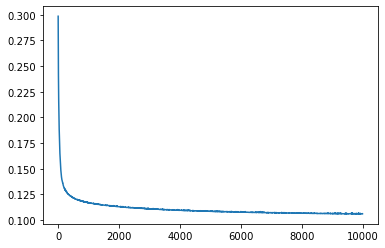

In [322]:
cost = LogRegression.getLoss()
plt.plot(cost)

From the loss function output, we can find that the cost function was initially to be very large(around 0.3) at the beginning of our model. However, it decreases very fast. At the beginning 0-200 interations, it decreases to 0.125, and it still decrease. Finally, the loss function curve become closer and closer to 0 by the time the iterations increasing, and it finally get close to 0. This means our model is more and more approach to the real model by the iterations increasing.

### Performance

#### e) Calculate the Confusion matrix and explain the model accuracy

In [323]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest,Ypred)

array([[  0,   3,   0,   0,   0,   0],
       [  1, 125,  41,   0,   0,   0],
       [  0,  33, 483,  21,   0,   0],
       [  0,   1,  75,  21,   2,   0],
       [  0,   0,  14,  12,   0,   0],
       [  0,   0,   2,   2,   0,   0]])

By checking the confusion matrix of the Ypred and Ytest, we find that our model performing well at predicting 'A2' and 'A3', which matches our find in the previous insights. 

For the 'A1' class, we find that 0 'A1' class has been recognized as 'A1', which is bad because we want to predict 'A1' as 'A1' as expected. However, there are 3 'A1' has been predicted as 'A2', and there are no 'A1' be predicted as 'A3','A4','A5' or 'A6'. This means our model is not too bad. Although we didn't doing well in predicting 'A1' as 'A1', we predict them as 'A2' which is the nearest class of 'A1'.

For the 'A2' class, we find that 125 'A2' class has been recognized as 'A2', which means our model doing well because nearly 74.85% 'A2' class has been predicted correct. We find that only 1 'A2' class has been predicted as 'A1', and 41 'A2' class has been predicted as 'A3'. And there are no 'A2' class has been predicted as 'A4', 'A5' or 'A6'. This means although we can't successfully catch some 'A2' class, we predicted them as 'A1' or 'A3'. And both of 'A1' and 'A3' are the nearest columns around 'A2'. This means our model doing very well when we predict 'A2' class.

For the 'A3' class, we find that 483 'A3' class has been recognized as 'A3', which means our model doing well because nearly 89.94% 'A3' class has been predicted correct. We find that 33 'A3' class has been predicted as 'A2', and 21 'A3' class has been predicted as 'A4'. And there are no 'A3' class has been predicted as 'A1', 'A5' or 'A6'. This means although we can't successfully catch some 'A3' class, we predicted them as 'A2' or 'A4'. And both of 'A2' and 'A3' are the nearest columns around 'A3'. This means our model doing very well when we predict 'A3' class.

For the 'A4' class, we find that 21 'A4' class has been recognized as 'A4', which is bad because only 21.43% 'A4' class has been predicted correctly. However, there are 75 'A4' has been predicted as 'A3', and there are 1 'A4' be predicted as 'A2' and 2 'A4' be predicted as 'A5'. And there are no 'A4' be predicted as 'A1' or 'A6'. This means our model is not too bad. Although we didn't doing well in predicting 'A4' as 'A4', we predict the 'A4' to 'A3' mostly which is the nearest class of 'A4', and predict some 'A2' and 'A5' which are near to 'A4' and 'A3'.

For the 'A5' class, we find that 0 'A5' class has been recognized as 'A5', which is very bad because we want to predict 'A5' as 'A5' as expected. However, there are 12 'A5' has been predicted as 'A4', and there are 14 'A5' be predicted as 'A3'. And there are no 'A5' be predicted as 'A1','A2',or 'A6'. Although we didn't doing well in predicting 'A5' as 'A5', we predict the 'A4' to 'A3' which are the nearest class of 'A5'. We can find here that our model would very like to predict as 'A3'.

For the 'A6' class, we find that 0 'A6' class has been recognized as 'A6', which is very bad because we want to predict 'A6' as 'A6' as expected. However, there are 2 'A6' has been predicted as 'A4', and there are 2 'A5' be predicted as 'A3'. And there are no 'A6' be predicted as 'A1','A2',or 'A5'. We didn't do well in predicting 'A6' in this model. Maybe because that 'A6' is very rare in the training set.

To conclude, our model did very good when they are predicting 'A2' and 'A3'.They did not that bad when predicting other classes because they mostly predict the class to the  nearest age classes. However, for 'A5' and 'A6', our model didn't do very well because that we didn't have too many 'A5' and 'A6' classes for the model to train. They are most likely been predicted as 'A3' or 'A4'. 

In [341]:
def accuracy(y_pred, y_test):
    return round(np.sum(y_pred==y_test)/len(y_test),5)

acc = accuracy(Ypred, Ytest)
print(acc)

0.75239


From the accuracy analysis, we find that our model overall accuracy is around 75.24%, which is a good performance. Even though we didn't get 80% or higher performance, by checking the confusion matrix, we can see that most of the wrong predicted class has been predicted to the nearest classes of the real class. So, our model didn't do bad in predicting this dataset.

## 2. Perform Principal component Analysis for the same dataset (15 points)

a) Show top 3 of the PCA component output

b) Plot the PCA 1, PCA 2 , and PCA2 components

c) Could you use PCA component for logistic regression? 

In [269]:
dfdata

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS,AGE,CLASS,ClassValue
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,A4,4
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,A2,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,A3,3
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,A3,3
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,A2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,A3,3
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,A3,3
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,A3,3
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,A3,3


In [271]:
X

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.67483383,
         1.31667716, -0.68801788],
       [-1.44898585, -1.439929  , -1.18397831, ..., -0.67483383,
         1.31667716, -0.68801788],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.48184628,
        -0.75948762, -0.68801788],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ..., -0.67483383,
         1.31667716, -0.68801788],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.48184628,
        -0.75948762, -0.68801788],
       [ 1.54905203,  1.48263359,  1.32665906, ..., -0.67483383,
         1.31667716, -0.68801788]])

#### a) Show top 3 of the PCA component output

In [279]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

PCA Model

In [362]:
class PCA:
    """
     Implement the PCA from scratch
    """
    def __init__(self, n_components):
        """
         Constructor for PCA class

        Args:
            n_components (_type_): _description_
        """
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        """
        Fit the PCA model

        Args:
            X (_type_): _description_
        """
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [325]:
# Project the data onto the 3 primary principal components

pca = PCA(3)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
x3 = X_projected[:, 2]

Shape of X: (4177, 10)
Shape of transformed X: (4177, 3)


In [326]:
# Show top 3 of the PCA component output

print("Top 3 of the PCA component output")
print("PCA 1 component:", x1)
print("PCA 2 component:", x2)
print("PCA 3 component:", x3)

Top 3 of the PCA component output
PCA 1 component: [-1.44286204 -2.97108389 -0.16552436 ...  2.29056034  1.85945358
  4.88197121]
PCA 2 component: [-1.52366389 -1.54940327  1.4843977  ... -1.44371345  1.50185076
 -1.44054715]
PCA 3 component: [-1.151518   -1.65218931 -1.14727378 ...  0.0103649  -0.45871938
  0.93819426]


These are the top 3 of the PCA component output

#### b) Plot the PCA 1, PCA 2 , and PCA2 components

In [327]:
# Define the color of the plot

def plot_color(list):
  col = []
  for l in list:
    if l == 'A1': col.append('r')
    elif l == 'A2': col.append('g')
    elif l == 'A3': col.append('b')
    elif l == 'A4': col.append('y')
    elif l == 'A5': col.append('c')
    else: col.append('m')
  return col

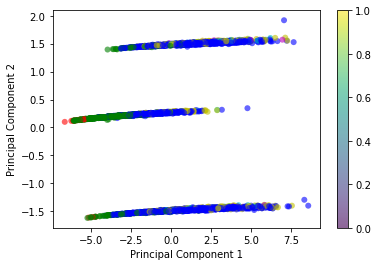

In [329]:
# Plot PCA1 and PCA2

colors = plot_color(Y)

plt.scatter(x1, x2, color=colors, edgecolor="none", alpha=0.6 )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

We can see from this scatter plot that the data are clustered as 3 lines

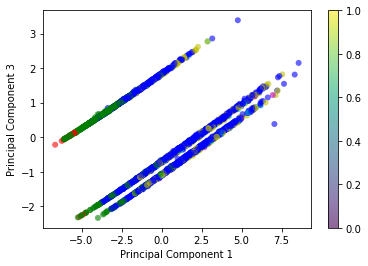

In [342]:
# Plot PCA1 and PCA3

colors = plot_color(Y)

plt.scatter(x1, x3, color=colors, edgecolor="none", alpha=0.6 )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.colorbar()
plt.show()

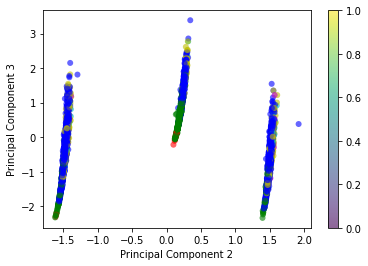

In [343]:
# Plot PCA2 and PCA3

colors = plot_color(Y)

plt.scatter(x2, x3, color=colors, edgecolor="none", alpha=0.6 )

plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")
plt.colorbar()
plt.show()

In [335]:
! pip install plotly==5.10.0

  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)


In [339]:
# 3D to plot PCA1, PCA2 and PCA3
import plotly.express as px

fig = px.scatter_3d(
    X_projected, 
    x=x1, y=x2, z=x3, 
    color=Y,
    title='3 Component PCA',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

#### c) Could you use PCA component for logistic regression? 

The answer is yes. We can use PCA component for logistic regression.

In [370]:
pca = PCA(10)

# Fit PCA on training dataset only
pca.fit(Xtrain)

# Transform both training and test dataset
xtrain_projected = pca.transform(Xtrain)
xtest_projected = pca.transform(Xtest)

In [371]:
# Train the logistic model with transformed training dataset

LogRegression_2 = MultiClassLogisticRegression()
LogRegression_2.train(xtrain_projected, Ytrain)

In [372]:
# Predict the age category

Ypred_2 = LogRegression_2.predict_classes(xtest_projected)
Ypred_2

array(['A3', 'A3', 'A2', 'A3', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3',
       'A3', 'A3', 'A2', 'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A3', 'A3',
       'A3', 'A2', 'A3', 'A4', 'A3', 'A3', 'A3', 'A3', 'A4', 'A3', 'A3',
       'A3', 'A3', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3',
       'A4', 'A2', 'A4', 'A3', 'A3', 'A2', 'A3', 'A2', 'A3', 'A2', 'A4',
       'A3', 'A4', 'A2', 'A2', 'A2', 'A3', 'A4', 'A3', 'A2', 'A3', 'A3',
       'A4', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3',
       'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A2', 'A2',
       'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A3',
       'A3', 'A3', 'A2', 'A3', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A3',
       'A3', 'A3', 'A3', 'A3', 'A3', 'A4', 'A3', 'A2', 'A3', 'A3', 'A4',
       'A3', 'A3', 'A2', 'A2', 'A3', 'A3', 'A2', 'A3', 'A3', 'A4', 'A3',
       'A3', 'A3', 'A3', 'A3', 'A4', 'A3', 'A3', 'A2', 'A3', 'A3', 'A2',
       'A3', 'A2', 'A4', 'A3', 'A3', 'A2', 'A2', 'A

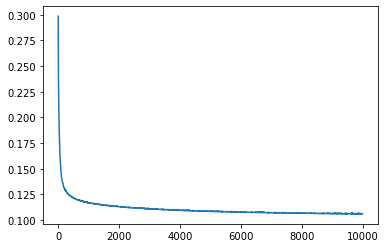

In [373]:
cost = LogRegression_2.getLoss()
plt.plot(cost)

From the loss function output, we can find that the cost function was initially to be very large(around 0.3) at the beginning of our model. However, it decreases very fast. At the beginning 0-200 iterations, it decreases to 0.125, and it still decrease. Finally, the loss function curve become closer and closer to 0 by the time the iterations increasing, and it finally get close to 0. This means our model is more and more approach to the real model by the iterations increasing.

In [374]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest,Ypred_2)

array([[  0,   3,   0,   0,   0,   0],
       [  1, 125,  41,   0,   0,   0],
       [  0,  33, 483,  21,   0,   0],
       [  0,   1,  75,  21,   2,   0],
       [  0,   0,  14,  12,   0,   0],
       [  0,   0,   2,   2,   0,   0]])

In [375]:
def accuracy(y_pred, y_test):
    return round(np.sum(y_pred==y_test)/len(y_test),5)

acc = accuracy(Ypred_2, Ytest)
print(acc)

0.75239


From the accuracy analysis, we find that our model overall accuracy is around 75.24%, which is a good performance. By using PCA, we don't get too many difference on the model accuracy. However, our computation has been greatly speed up because we reduce the noise. 